In [1]:
import os
import sys
sys.path.append(os.path.abspath(r"//Users/shyhhao/Documents/AML_Assignment/AMLSassignment19_-20_SN16067637/B1"))

import B1_landmarks as b1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap


Using TensorFlow backend.
/Users/shyhhao/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/shyhhao/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/shyhhao/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/shyhhao/anaconda3/lib/python3.7/site-packag

In [2]:
def get_data_B1():

    X_B1, y_B1 = b1.extract_features_labels()
    Y_B1 = np.array([y_B1, -(y_B1 - 1)]).T

    # Rescaling Data
    scaler = StandardScaler()
    temp_X_reshape = X_B1.reshape(len(X_B1), len(X_B1[0]) * len(X_B1[0][0]))
    temp_X_B1 = scaler.fit_transform(temp_X_reshape)

    tr_X_B1, te_X_B1, tr_Y_B1, te_Y_B1 = train_test_split(temp_X_B1, Y_B1, test_size=0.3, random_state=0)

#     print(tr_X_B1.shape)
#     print(te_X_B1.shape)
#     print(tr_Y_B1.shape)
#     print(te_Y_B1.shape)
    
    return tr_X_B1, tr_Y_B1, te_X_B1, te_Y_B1


In [3]:
def B1_SVM(training_images, training_labels, test_images, test_labels):
#     classifier = svm.SVC(kernel='linear', C = 0.05)
    tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 100]},
                        {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C':[1, 10, 100]},
                        {'kernel': ['poly'], 'degree': [2, 3], 'C': [1, 10, 100]}
                        ]
    classifier = GridSearchCV(svm.SVC(), tuned_parameters, n_jobs = -1)
#     lab_enc = preprocessing.LabelEncoder()
    classifier.fit(training_images, training_labels)
                                
#  SVM Accuracy
    acc_B1_train = classifier.best_score_

#  Choosing the best accuracy using GridSearchCV
    pred_B1 = classifier.best_estimator_.predict(test_images)
    acc_B1_test = accuracy_score(test_labels, pred_B1)
    
    print(classifier.best_estimator_)
    print()
    print(classifier.best_params_)
    
    return acc_B1_train, acc_B1_test, pred_B1
#     pred = classifier.predict(test_images)
#     print(pred)
#     print("Accuracy:", accuracy_score(test_labels, pred))
    


In [4]:
# Run B1 accuracy test(MAIN.py)
from datetime import datetime
start = datetime.now()
    
tr_X_B1, tr_Y_B1, te_X_B1, te_Y_B1= get_data_B1()

model_B1 = B1_SVM(tr_X_B1, list(zip(*tr_Y_B1))[0], te_X_B1, list(zip(*te_Y_B1))[0])

acc_B1_train, acc_B1_test, pred_B1 = model_B1

print('TB1:{},{}'.format(acc_B1_train, acc_B1_test))

print(datetime.now() - start)

###IGNORE BELOW, FOR DEBUGGING PURPOSES
# from datetime import datetime
# start = datetime.now()
    
# try:
# 	tr_X_B1, tr_Y_B1, te_X_B1, te_Y_B1= get_data_B1()

# 	model_B1 = B1_SVM(tr_X_B1, list(zip(*tr_Y_B1))[0], te_X_B1, list(zip(*te_Y_B1))[0])

# 	acc_B1_train, acc_B1_test, pred_B1 = model_B1
    
#     print('TB1:{},{}'.format(acc_B1_train, acc_B1_test))
# except Exception as e:
# 	print(e)

# print(datetime.now() - start)

/Users/shyhhao/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
TB1:0.7597210113339146,0.7751118340788938
0:26:10.954972


In [6]:
# def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
#                         train_sizes=np.linspace(.1, 1.0, 5)):
#     """
#     Generate a simple plot of the test and training learning curve.

#     Parameters
#     ----------
#     estimator : object type that implements the "fit" and "predict" methods
#         An object of that type which is cloned for each validation.

#     title : string
#         Title for the chart.

#     X : array-like, shape (n_samples, n_features)
#         Training vector, where n_samples is the number of samples and
#         n_features is the number of features.

#     y : array-like, shape (n_samples) or (n_samples, n_features), optional
#         Target relative to X for classification or regression;
#         None for unsupervised learning.

#     ylim : tuple, shape (ymin, ymax), optional
#         Defines minimum and maximum yvalues plotted.

#     cv : integer, cross-validation generator, optional
#         If an integer is passed, it is the number of folds (defaults to 3).
#         Specific cross-validation objects can be passed, see
#         sklearn.cross_validation module for the list of possible objects
#     """
    
#     if axes is None:
#         _, axes = plt.subplots(1, 3, figsize=(20, 5))

#     axes[0].set_title(title)
#     if ylim is not None:
#         axes[0].set_ylim(*ylim)
#     axes[0].set_xlabel("Training examples")
#     axes[0].set_ylabel("Score")

#     train_sizes, train_scores, test_scores, fit_times, _ = \
#         learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
#                        train_sizes=train_sizes,
#                        return_times=True)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     fit_times_mean = np.mean(fit_times, axis=1)
#     fit_times_std = np.std(fit_times, axis=1)
    
#     # Plot learning curve
#     axes[0].grid()
#     axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
#                          train_scores_mean + train_scores_std, alpha=0.1,
#                          color="r")
#     axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
#                          test_scores_mean + test_scores_std, alpha=0.1,
#                          color="g")
#     axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
#                  label="Training score")
#     axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
#                  label="Cross-validation score")
#     axes[0].legend(loc="best")

#     # Plot n_samples vs fit_times
#     axes[1].grid()
#     axes[1].plot(train_sizes, fit_times_mean, 'o-')
#     axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
#                          fit_times_mean + fit_times_std, alpha=0.1)
#     axes[1].set_xlabel("Training examples")
#     axes[1].set_ylabel("fit_times")
#     axes[1].set_title("Scalability of the model")

#     # Plot fit_time vs score
#     axes[2].grid()
#     axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
#     axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
#                          test_scores_mean + test_scores_std, alpha=0.1)
#     axes[2].set_xlabel("fit_times")
#     axes[2].set_ylabel("Score")
#     axes[2].set_title("Performance of the model")

#     return plt

In [49]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

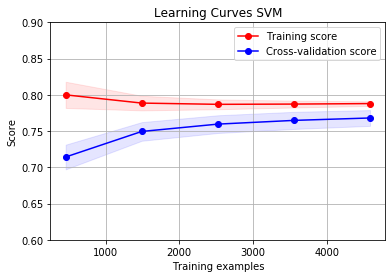

In [50]:
# Learning Curve
title = "Learning Curves SVM"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = svm.SVC(kernel='rbf', gamma=1e-3, C=100)
X, y = tr_X_B1, list(zip(*tr_Y_B1))[0]
plot_learning_curve(estimator, title, X, y, (0.6, 0.9), cv=cv, n_jobs=-1)

plt.show()

[[358  42  29  11  37]
 [ 52 330  37  25  37]
 [ 10  19 442  24  20]
 [ 14  32  58 374  16]
 [ 31  17  28  14 402]]


<function matplotlib.pyplot.show(*args, **kw)>

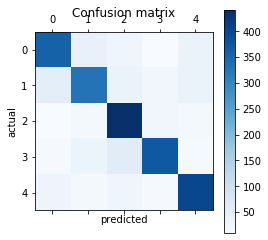

In [28]:
test_label = list(zip(*te_Y_B1))[0]
cf = confusion_matrix(test_label, pred_B1)
# print(cf)

cmap = plt.cm.Blues

plt.matshow(cf, cmap = cmap)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show

# Using CNN

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import pandas as pd
from sklearn import svm
from keras.preprocessing.image import ImageDataGenerator

srcdir = '/Users/shyhhao/Documents/AMLSassignment19_-20_LSH_SN16067637/AMLS_19-20_LSH_SN16067637/dataset_AMLS_19-20/dataset_AMLS_19-20/cartoon_set/img'

In [30]:
df = pd.read_csv("/Users/shyhhao/Documents/AMLSassignment19_-20_LSH_SN16067637/AMLS_19-20_LSH_SN16067637/dataset_AMLS_19-20/dataset_AMLS_19-20/cartoon_set/labels.csv")
df = pd.DataFrame(df).reset_index()
df.columns = ['Index', 'Total']
del df['Index']
df['eye_color'] = df['Total'].str.split('\t').str[1]
df['face_shape'] = df['Total'].str.split('\t').str[2]
df['img_name'] = df['Total'].str.split('\t').str[3]
del df['Total']
del df['eye_color']
df

,face_shape,img_name
0,4,0.png
1,4,1.png
2,3,2.png
3,0,3.png
4,2,4.png
...,...,...
9995,2,9995.png
9996,3,9996.png
9997,2,9997.png
9998,2,9998.png


In [31]:
train, test = train_test_split(df, test_size = 0.2, random_state = 0)
print(len(train))
print(len(test))

8000
2000


In [32]:
xcol = 'img_name'
ycol = 'face_shape'

print('Receiving data..')
data = ImageDataGenerator(rescale = 1./255.,
                          validation_split = 0.25,
                          horizontal_flip = True,
                          vertical_flip = True
                         )

print('Arranging training dataset..')
train_gen = data.flow_from_dataframe(dataframe = train,
                                     directory = srcdir,
                                     x_col = xcol,
                                     y_col = ycol,
                                     class_mode = 'categorical',
                                     target_size = (64,64),
                                     batch_size = 32,
                                     subset = 'training'
                                    )

print('Arranging validation dataset..')
val_gen = data.flow_from_dataframe(dataframe = train,
                                   directory = srcdir,
                                   x_col = xcol,
                                   y_col = ycol,
                                   class_mode = 'categorical',
                                   target_size = (64,64),
                                   batch_size = 32,
                                   subset = 'validation'
                                  )

Receiving data..
Arranging training dataset..
Found 6000 validated image filenames belonging to 5 classes.
Arranging validation dataset..
Found 2000 validated image filenames belonging to 5 classes.


In [33]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(24, (3,3), input_shape=train_gen.image_shape))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(24, (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(48, (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(96, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(5))
model.add(Activation("softmax"))

opt = optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 24)        672       
_________________________________________________________________
activation_6 (Activation)    (None, 62, 62, 24)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 24)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 24)        5208      
_________________________________________________________________
activation_7 (Activation)    (None, 29, 29, 24)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 27, 27, 48)        10416     
_________________________________________________________________
activation_8 (Activation)    (None, 27, 27, 48)        0         
__________

In [34]:
from datetime import datetime
start = datetime.now()
cnn_training = model.fit_generator(train_gen, 
                                   steps_per_epoch = train_gen.samples // 32,
                                   validation_data = val_gen, 
                                   validation_steps = val_gen.samples // 32,
                                   epochs = 25
                                  )
print(datetime.now() - start)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/25
187/187 [==============================] - 53s 282ms/step - loss: 1.5249 - acc: 0.2854 - val_loss: 1.0105 - val_acc: 0.5605
Epoch 2/25
187/187 [==============================] - 51s 274ms/step - loss: 0.4462 - acc: 0.8326 - val_loss: 0.2243 - val_acc: 0.9177
Epoch 3/25
187/187 [==============================] - 47s 251ms/step - loss: 0.1562 - acc: 0.9455 - val_loss: 0.1380 - val_acc: 0.9502
Epoch 4/25
187/187 [==============================] - 38s 202ms/step - loss: 0.0949 - acc: 0.9664 - val_loss: 0.0781 - val_acc: 0.9715
Epoch 5/25
187/187 [==============================] - 36s 194ms/step - loss: 0.0737 - acc: 0.9741 - val_loss: 0.0762 - val_acc: 0.9756
Epoch 6/25
187/187 [==============================] - 39s 211ms/step - loss: 0.0488 - acc: 0.9840 - val_loss: 0.0714 - val_acc: 0.9751
Epoch 7/25
187/187 [==============================] - 48s 255ms/step - loss: 0.0392 - acc: 0.98

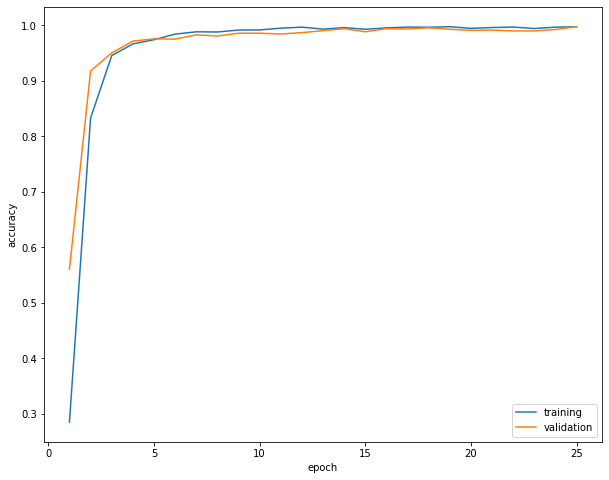

In [46]:
num_epochs = 25
epoch_nums = range(1,num_epochs+1)
training_acc = cnn_training.history['acc']
validation_acc = cnn_training.history['val_acc']
plt.figure(figsize=(10,8))
plt.plot(epoch_nums, training_acc)
plt.plot(epoch_nums, validation_acc)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

Generating predictions from validation data..
[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  8  0]
 [ 0  0  0  0 10]]


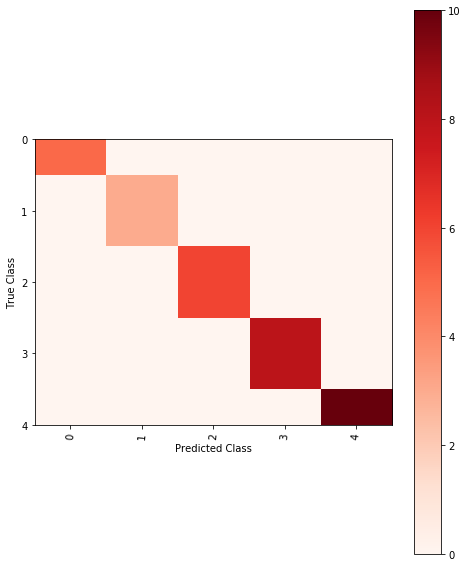

In [48]:
print("Generating predictions from validation data..")

x_test = val_gen[0][0]
y_test = val_gen[0][1]

class_probabilities = model.predict(x_test)

predictions = np.argmax(class_probabilities, axis=1)

true_labels = np.argmax(y_test, axis=1)

classes = ["0", "1", "2", "3" , "4"]

cm = confusion_matrix(true_labels, predictions)
# print(cm)

plt.figure(figsize=(8,10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Reds)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes , rotation=85)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()